In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2023-04-19 21:49:45--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M   107MB/s    in 1.8s    

2023-04-19 21:49:47 (107 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [5]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov2.cfg

--2023-04-19 21:50:48--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov2.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2726 (2.7K) [text/plain]
Saving to: ‘yolov2.cfg’

yolov2.cfg          100%[===================>]   2.66K  --.-KB/s    in 0s      

2023-04-19 21:50:48 (40.6 MB/s) - ‘yolov2.cfg’ saved [2726/2726]



In [9]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2023-04-19 21:52:03--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2023-04-19 21:52:03 (25.3 MB/s) - ‘coco.names’ saved [625/625]



In [7]:
yolo = cv2.dnn.readNet("/content/yolov2.weights", "/content/yolov2.cfg")
classes = []

In [10]:
with open("/content/coco.names", "r") as file:
    classes = [line.strip() for line in file.readlines()]
layer_names = yolo.getLayerNames()
output_layers = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]

colorBlue = (0,0,255)
colorGreen = (0,255,0)

In [39]:
p1 = "/content/p1.jpg"
p2 = "/content/p2.jpg"
p3 = "/content/p4.jpg"
p4 = "/content/FRP4ETXGG7XWEYYDF34LTKOPPM.jpg"

In [40]:
img = cv2.imread(p4)
height, width, channels = img.shape

In [41]:
# # Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

yolo.setInput(blob)
outputs = yolo.forward(output_layers)
class_ids = []
confidences = []
boxes = []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]]) + " " + str(round(confidences[i], 3))
        cv2.rectangle(img, (x, y), (x + w, y + h), colorGreen, 3)
        cv2.putText(img, label, (x, y - 20), cv2.FONT_HERSHEY_PLAIN, 4, colorBlue, 6)

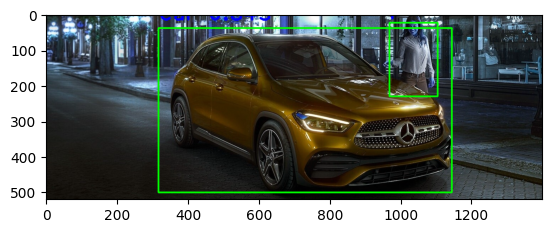

In [27]:
plt.imshow(img)

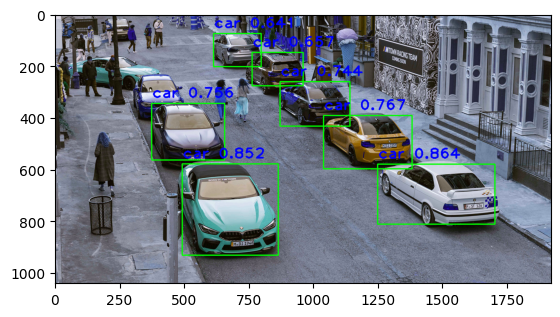

In [30]:
plt.imshow(img)

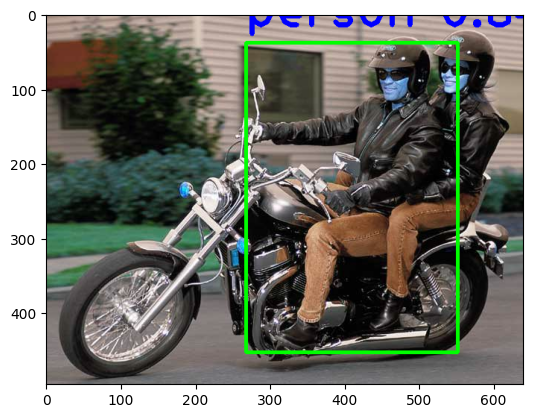

In [42]:
plt.imshow(img)

In [38]:
!pip install --upgrade mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [43]:
!pip install torch==1.8.0+cpu torchvision==0.9.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.8.0+cpu which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but y

In [44]:
!pip install --upgrade gluoncv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.4 MB/s eta 0:00:00


In [45]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

/usr/local/lib/python3.9/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.8.0+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [46]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:03, 56449.49KB/s]                            


In [76]:
img1 = utils.download('https://dealerinspire-image-library-prod.s3.us-east-1.amazonaws.com/images/6HhpCV9oMpxELp2RloGAewlNPIIg3P4LuWuvTXsO.jpg', path='https://dealerinspire-image-library-prod.s3.us-east-1.amazonaws.com/images/6HhpCV9oMpxELp2RloGAewlNPIIg3P4LuWuvTXsO.jpg')
img2 = utils.download('https://www.carscoops.com/wp-content/uploads/2020/12/BMW-M-Tow.jpg', path='https://www.carscoops.com/wp-content/uploads/2020/12/BMW-M-Tow.jpg')
img3 = utils.download('https://cloudfront-us-east-1.images.arcpublishing.com/octane/FRP4ETXGG7XWEYYDF34LTKOPPM.jpg', path='https://cloudfront-us-east-1.images.arcpublishing.com/octane/FRP4ETXGG7XWEYYDF34LTKOPPM.jpg')

100%|██████████| 188/188 [00:00<00:00, 1018.67KB/s]


In [77]:
x1, image1 = data.transforms.presets.ssd.load_test(img1, short=512)
x2, image2 = data.transforms.presets.ssd.load_test(img2, short=512)
x3, image3 = data.transforms.presets.ssd.load_test(img3, short=512)

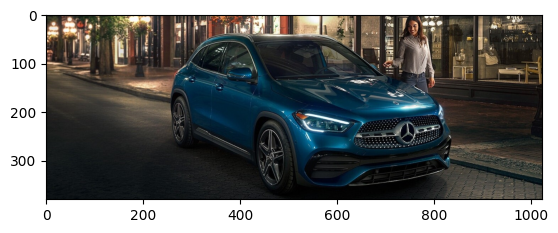

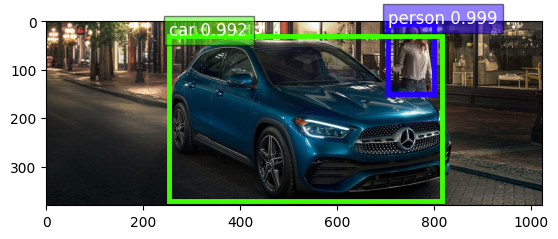

In [78]:

class_IDs, scores, bounding_boxes = net(x1)
plt.imshow(image1)
ax = utils.viz.plot_bbox(image1, bounding_boxes[0], scores[0], class_IDs[0], class_names=net.classes)
plt.show()

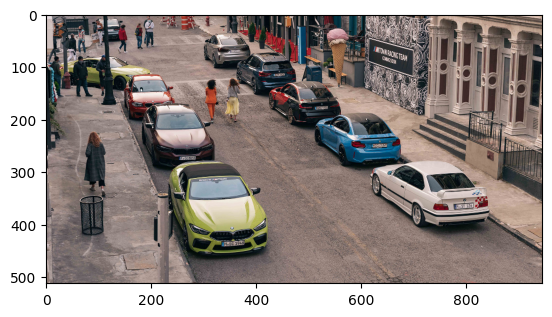

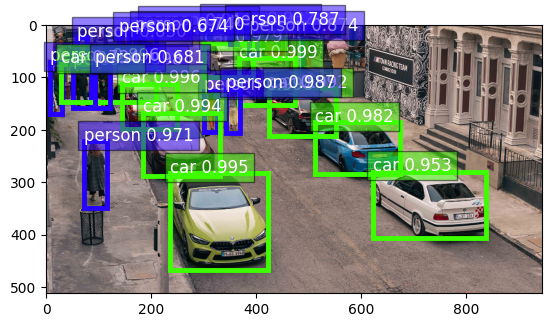

In [68]:

class_IDs, scores, bounding_boxes = net(x2)
plt.imshow(image2)
ax = utils.viz.plot_bbox(image2, bounding_boxes[0], scores[0], class_IDs[0], class_names=net.classes)
plt.show()

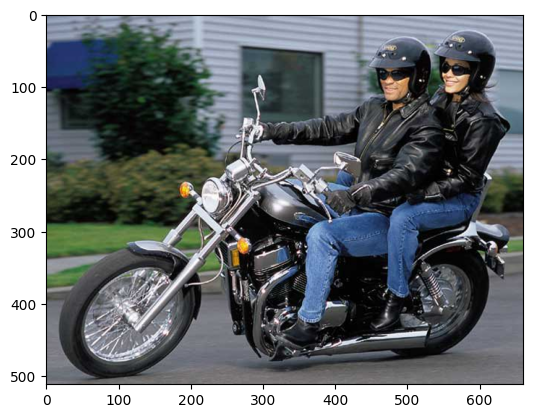

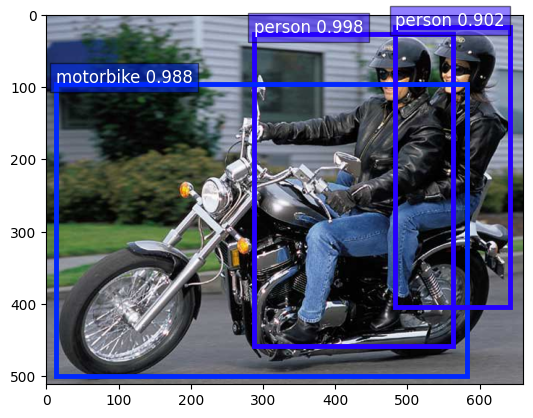

In [65]:

class_IDs, scores, bounding_boxes = net(x3)
plt.imshow(image3)
ax = utils.viz.plot_bbox(image3, bounding_boxes[0], scores[0], class_IDs[0], class_names=net.classes)
plt.show()